In [1]:
# Notebook to plot the old (RMG GAV) and new (My DFT) estimates of the thermo for species 85

In [2]:
import os
import numpy as np

import rmgpy.chemkin
import rmgpy.data.thermo


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot_thermos(thermos, labels=None):
    %matplotlib inline
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(300, 3000, 1001)
    for thermo in thermos:
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        for i in range(0, len(T)):
            H[i] = thermo.get_enthalpy(T[i]) / 1000.0
            S[i] = thermo.get_entropy(T[i]) / 1000.0
            Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        ax[0].plot(T, H)
        ax[1].plot(T, S)
        ax[2].plot(T, Cp)
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [4]:
def plot_thermo_diff(thermo1, thermo2):
    %matplotlib inline
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('$\Delta$H (kJ / mol)')
    ax[0].set_title('Enthalpy Difference vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('$\Delta$S (kJ / mol K)')
    ax[1].set_title('Entropy Difference vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('$\Delta$Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity Difference vs. Temperature')
    T = np.linspace(300, 3000, 1001)
    H = np.zeros(len(T))
    S = np.zeros(len(T))
    Cp = np.zeros(len(T))
    for i in range(0, len(T)):
        H[i] = (thermo1.get_enthalpy(T[i]) - thermo2.get_enthalpy(T[i])) / 1000.0
        S[i] = (thermo1.get_entropy(T[i]) - thermo2.get_entropy(T[i])) / 1000.0
        Cp[i] = (thermo1.get_heat_capacity(T[i]) - thermo2.get_heat_capacity(T[i])) / 1000.0
    ax[0].plot(T, H)
    ax[1].plot(T, S)
    ax[2].plot(T, Cp)
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [5]:
# Load the base model
basedir = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/rmg_model'
base_chemkin = os.path.join(basedir, 'chem_annotated.inp')
dictionary = os.path.join(basedir, 'species_dictionary.txt')
transport = os.path.join(basedir, 'tran.dat')
species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(base_chemkin, dictionary_path=dictionary, transport_path=transport)
print(f'{len(species_list)} species, {len(reaction_list)} reactions')


110 species, 1822 reactions


In [6]:
# Load the new thermo library
DFT_DIR = "/work/westgroup/harris.se/autoscience/autoscience/butane/dft/"
thermo_lib = os.path.join(DFT_DIR, 'thermo', 'thermo')
ark_thermo_database = rmgpy.data.thermo.ThermoDatabase()
ark_thermo_database.load_libraries(thermo_lib)
print(f'{len(ark_thermo_database.libraries["harris_butane"].entries)} entries')

92 entries


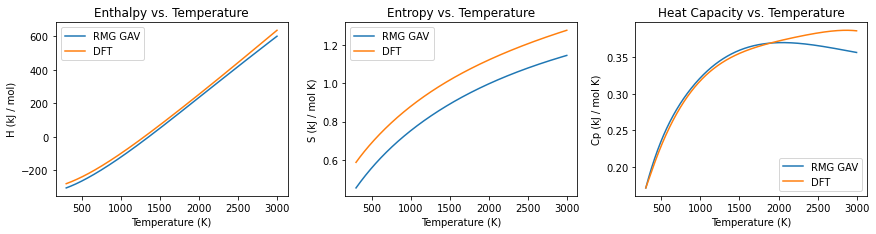

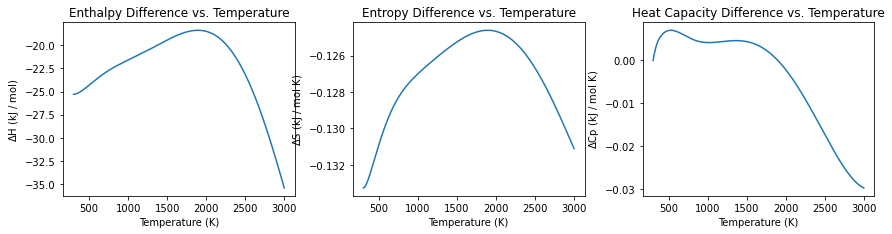

In [7]:
# stitch each of the library thermos into the mechanism
plot_index = 85

species = species_list[plot_index]

for key in ark_thermo_database.libraries['harris_butane'].entries.keys():
    entry = ark_thermo_database.libraries['harris_butane'].entries[key]

    if entry.item.smiles == species_list[plot_index].smiles:
        plot_thermos([species_list[plot_index], entry.data], ['RMG GAV', 'DFT'])
        plot_thermo_diff(species_list[plot_index], entry.data)
        break

In [ ]:
# make a copy to perturb
